In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for name in data.columns:
    data[name] = le.fit_transform(data[name])

In [10]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [11]:
from sklearn.model_selection import train_test_split
X = data.drop(['class'],axis=1)
Y = data['class']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [12]:
#ANN
import tensorflow as tf
from tensorflow import keras

In [13]:
X_train.shape

(6499, 22)

In [14]:
model = keras.models.Sequential()
activation = 'relu'
model.add(keras.layers.Flatten(input_shape=[22]))
model.add(keras.layers.Dense(22,activation=activation))
model.add(keras.layers.Dense(11,activation=activation))
model.add(keras.layers.Dense(1,activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22)                0         
                                                                 
 dense (Dense)               (None, 22)                506       
                                                                 
 dense_1 (Dense)             (None, 11)                253       
                                                                 
 dense_2 (Dense)             (None, 1)                 12        
                                                                 
Total params: 771 (3.01 KB)
Trainable params: 771 (3.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(loss="BinaryCrossentropy",optimizer="adam",metrics=["accuracy"])

In [16]:
history = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 30)

Epoch 1/30
204/204 [==============================] - 1s 2ms/step - loss: 0.7986 - accuracy: 0.6789 - val_loss: 0.4575 - val_accuracy: 0.8197
Epoch 2/30
204/204 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8515 - val_loss: 0.3308 - val_accuracy: 0.8726
Epoch 3/30
204/204 [==============================] - 0s 1ms/step - loss: 0.2635 - accuracy: 0.9040 - val_loss: 0.2588 - val_accuracy: 0.9015
Epoch 4/30
204/204 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9286 - val_loss: 0.2029 - val_accuracy: 0.9249
Epoch 5/30
204/204 [==============================] - 0s 1ms/step - loss: 0.1533 - accuracy: 0.9475 - val_loss: 0.1564 - val_accuracy: 0.9446
Epoch 6/30
204/204 [==============================] - 0s 1ms/step - loss: 0.1165 - accuracy: 0.9643 - val_loss: 0.1228 - val_accuracy: 0.9594
Epoch 7/30
204/204 [==============================] - 0s 1ms/step - loss: 0.0878 - accuracy: 0.9763 - val_loss: 0.0886 - val_accuracy: 0.9686
Epoch 

51/51 [==============================] - 0s 1ms/step
accuracy : 1.0
precision : 1.0
recall : 1.0


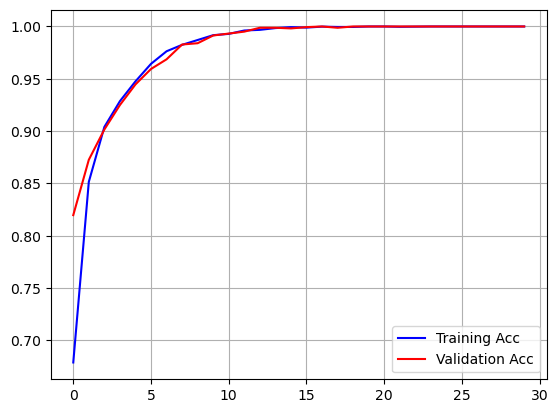

In [17]:
plt.plot(history.history["accuracy"],c='b')
plt.plot(history.history["val_accuracy"],c='r')
plt.grid()
plt.legend(["Training Acc","Validation Acc"])

import sklearn.metrics as metrics
y_pred = model.predict(X_test)
#print(y_pred)
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

acc = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall = metrics.recall_score(y_test,y_pred)

print(f'accuracy : {acc}')
print(f'precision : {precision}')
print(f'recall : {recall}')